In [1]:
# Load preprocessed data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
# Load the preprocessed data
data = pd.read_csv("/Users/omama/Documents/Portfolio/music-recommendation-system/music-recommender/data/processed/preprocessed_tracks.csv")

# Clustering with KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
data['audio_cluster'] = kmeans.fit_predict(data[['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo']])

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo']])

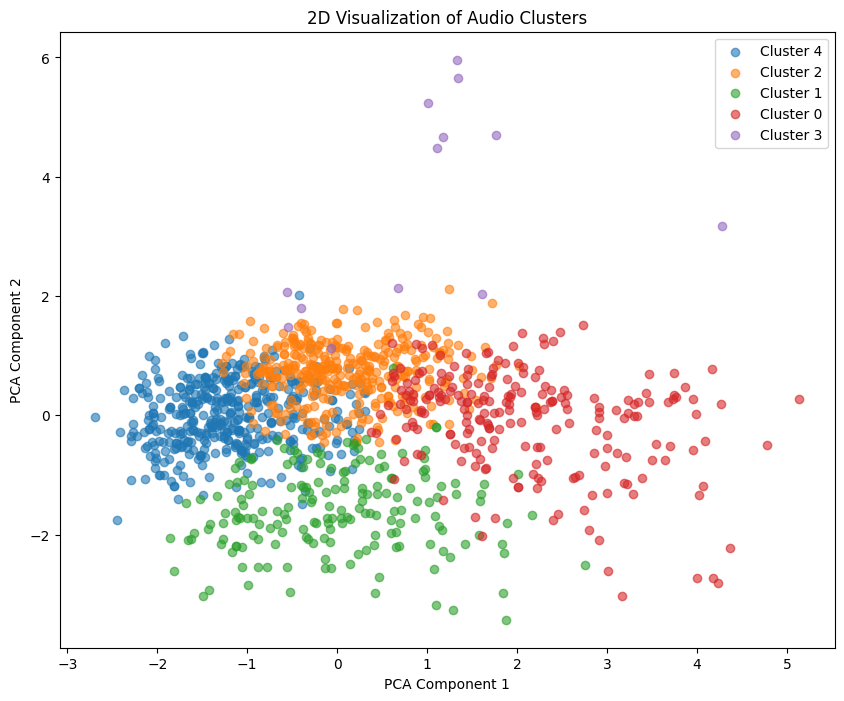

In [5]:
# Visualize Clusters
plt.figure(figsize=(10, 8))
for cluster in data['audio_cluster'].unique():
    plt.scatter(data_pca[data['audio_cluster'] == cluster, 0],
                data_pca[data['audio_cluster'] == cluster, 1],
                label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of Audio Clusters")
plt.legend()
plt.show()